# One Asset Model

This notebooks shows you how to use the tools of the **consav** package to solve the canonical **buffer-stock consumption model** with either

1. **vfi**: standard value function iteration

## Model equations

The model's **bellman equation** is given by

$$ 
\begin{aligned}
v_{t}(p_{t},m_{t}) &= \max_{c_t}\frac{c^{1-\rho}}{1-\rho} + \beta v_{t+1}(p_{t+1},m_{t+1}) \\
& \text{s.t.} \\ 
a_{t} &=m_{t}-c_{t} \\
p_{t+1} &=\psi_{t+1} p_{t} \\
\tilde{\xi}_{t+1} &= \begin{cases}
\mu & \text{with prob.}\pi\\
\frac{\xi_{t+1}-\pi\mu}{1-\pi} & \text{else}
\end{cases} \\
m_{t+1} &= R a_{t} + \tilde{\xi}_{t+1}p_{t+1}\\
a_t&\geq 0\\
\end{aligned}
$$

where

$$ \begin{aligned}
\log\psi_{t+1} &\sim \mathcal{N}(-0.5\sigma_{\psi}^{2},\sigma_{\psi}^{2}) \\
\log\xi_{t+1} &\sim \mathcal{N}(-0.5\sigma_{\xi}^{2},\sigma_{\xi}^{2})
\end{aligned}
$$

In the **last period** there is no continuation value

$$ 
\begin{aligned}
v_{T+1}(m_{T+1},p_{t+1}) &= 0
\end{aligned}
$$

The **post-decision** value function is

$$
\begin{aligned}
w_t(p_t,a_t) &= \beta v_{t+1}(m_{t+1},p_{t+1})
\end{aligned} 
$$

The **Euler-equation** (required when solving with EGM) is 

$$ 
\begin{aligned}
C_{t}^{-\rho} &= q_t(p_t,a_t) \\
 &= \beta R \mathbb{E}_t[C_{t+1}(p_{t+1},m_{t+1})^{-\rho}] 
\end{aligned}
$$

where $q_t(p_t,a_t)$ is the post-decision marginal value of cash.

# Setup

In [67]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load the OneAsset module
from model import OneAssetModelClass

# for timing
from consav.misc import elapsed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
nb.set_num_threads(1) # use a single thread for clarity

In [13]:
#Load baseline settings
model = OneAssetModelClass(name='baseline',par={'solmethod':'vfi','do_simple_w':True})

#Solve and simulate
model.solve()
model.simulate()

par = model.par
sol = model.sol # solve model
sim = model.sim # simulate the model

 t = 4 solved in 0.7 secs
 t = 3 solved in 33.4 secs (w: 33.4 secs)
 t = 2 solved in 30.1 secs (w: 30.1 secs)
 t = 1 solved in 30.1 secs (w: 30.1 secs)
 t = 0 solved in 30.1 secs (w: 30.1 secs)
model simulated in 1.2 secs


### Plots

In [72]:
import figs

# LaTeX style plotting
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('axes', axisbelow=True)

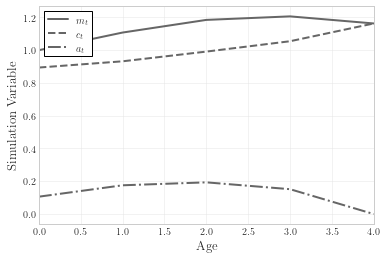

In [46]:
figs.lifecycle(model)

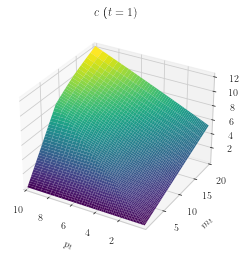

In [48]:
figs.consumption_function(model,1)

In [49]:
figs.consumption_function_interact(model)

interactive(children=(Dropdown(description='t', options=(0, 1, 2, 3, 4), value=0), Output()), _dom_classes=('w…

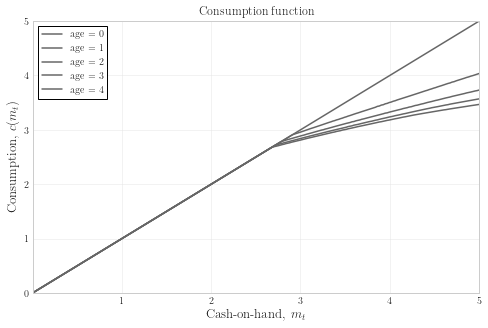

In [73]:
figs.plot_age_consumption(model)

- Note, this is for median permanent income, since we have 2 state variables in the model.